In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import expit

In [2]:
class NeuralNetwork(object):
    
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        self.i_nodes = input_nodes
        self.h_nodes = hidden_nodes
        self.o_nodes = output_nodes
        self.lr = learning_rate
        
        self.ih_weights = np.random.uniform(.0, pow(self.h_nodes, -0.5), (self.h_nodes, self.i_nodes))
        self.ho_weights = np.random.uniform(.0, pow(self.o_nodes, -0.5), (self.o_nodes, self.h_nodes))
        
        self.activation_func = lambda x: expit(x)
        
    #forward propagation and back propagation
    def train(self, input_list, true_list):
        
        inputs = np.array(input_list, ndmin=2).T
        targets = np.array(true_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.ih_weights, inputs)
        hidden_outputs = self.activation_func(hidden_inputs)
        
        final_inputs = np.dot(self.ho_weights, hidden_outputs)
        final_outputs = self.activation_func(final_inputs)
        
        #back propagation
        output_errors = targets - final_outputs
        hidden_errors =  np.dot(self.ho_weights.T, output_errors)
        
        self.ho_weights += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), \
                                            np.transpose(hidden_outputs))
        self.ih_weights += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), \
                                           np.transpose(inputs))
        
        
        pass
    
    
    def query(self, input_list):
        
        inputs = np.array(input_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.ih_weights, inputs)
        hidden_outputs = self.activation_func(hidden_inputs)
        
        final_inputs = np.dot(self.ho_weights, hidden_outputs)
        final_outputs = self.activation_func(final_inputs)
        
        return final_outputs
        
        

In [3]:
INPUT_NODES = 3
HIDDEN_NODES = 3
OUTPUT_NODES = 3
learning_rate = 0.5


nn = NeuralNetwork(INPUT_NODES, HIDDEN_NODES, OUTPUT_NODES, learning_rate)

In [4]:
nn.query([1.1, 2.1, 3.2])

array([[0.69424106],
       [0.73910843],
       [0.6636021 ]])

In [5]:
test_x = [
    [1, 0, 0],
    [0, 1, 0],
    [1, 1, 0],
    [0, 0, 0]
]

test_y = [
    [1, 0, 0],
    [1, 0, 0],
    [0, 1, 0],
    [0, 1, 0]
]

nn.train(test_x, test_y)

In [6]:
need_length = 1000

with open('data/mnist_test.csv', 'r') as f:
    mnist_y = []
    mnist_x = []
    for i in range(need_length):
        row = f.readline().split(',')
        mnist_y.append(row[0])
        mnist_x.append(row[1:])

label is 7
pic show below:


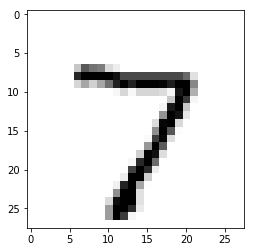

In [7]:
label, image_arr = mnist_y[0], np.array(mnist_x[0], dtype=np.float).reshape((28, 28))

print('label is {0}\npic show below:'.format(label))
plt.imshow(image_arr, cmap='Greys', interpolation='None')

In [8]:
INPUT_NODES = 28*28
HIDDEN_NODES = 100
OUTPUT_NODES = 10
learning_rate = 0.2

EPOCHS = 5

train_size = 900
test_size = 100

mnist_nn = NeuralNetwork(INPUT_NODES, HIDDEN_NODES, OUTPUT_NODES, learning_rate)

for epoch in range(EPOCHS):
    for i in range(train_size):

        inputs = np.array(mnist_x[i], dtype=np.float) / 255 * 0.99 + 0.01
        label = np.zeros(OUTPUT_NODES) + 0.01
        label[int(mnist_y[i])] = 0.99

        mnist_nn.train(inputs, label)

label is 9
pic show below:


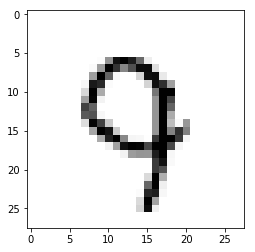

In [9]:
label, image_arr = mnist_y[-1], np.array(mnist_x[-1], dtype=np.float).reshape((28, 28))

print('label is {0}\npic show below:'.format(label))
plt.imshow(image_arr, cmap='Greys', interpolation='None')

In [10]:
mnist_nn.query(np.array(mnist_x[-1], dtype=np.float) / 255 * 0.99 + 0.01)

array([[0.01690708],
       [0.01756821],
       [0.01931665],
       [0.01464005],
       [0.13822195],
       [0.00904636],
       [0.01675017],
       [0.43178942],
       [0.08821457],
       [0.46657359]])

In [11]:
def test_score():
    err = 0
    for i in range(test_size):
        target = int(mnist_y[-i])
        pred_prob = mnist_nn.query(np.array(mnist_x[-i], dtype=np.float) / 255 * 0.99 + 0.01)
        pred = np.argmax(pred_prob)
        
        if target != pred:
            print('true {0}, pred {1}'.format(target, pred))
            err += 1
    
    return err, err/test_size

print('error (numbers, rate) : ({0})'.format(test_score()))

true 3, pred 8
true 2, pred 7
true 3, pred 8
true 3, pred 8
true 2, pred 7
true 6, pred 0
true 4, pred 9
true 7, pred 2
true 8, pred 9
true 3, pred 8
true 2, pred 0
true 3, pred 5
true 2, pred 7
true 7, pred 9
true 4, pred 9
true 4, pred 9
error (numbers, rate) : ((16, 0.16))


In [12]:
def train_test_split(X, y, rate=0.3):
    
    test_idx = np.random.choice(len(y), replace=False)
    
    pass

In [13]:
def cal_accuration(target, pred):
    err = 0
    sz = len(target)
    
    for idx in range(sz):
        if target[idx] != pred[idx]:
            err += 1
    
    return err, err/sz

In [14]:
def data_to_arr():
    ip_arr = []
    out_arr = []
    for i in range(train_size+test_size):

        inputs = np.array(mnist_x[i], dtype=np.double) / 255 * 0.99 + 0.01
        
        label = np.zeros(OUTPUT_NODES, dtype=np.double) + 0.01
        label[int(mnist_y[i])] = 0.99
        
        ip_arr.append(inputs)
        out_arr.append(label)
    
    return np.array(ip_arr), np.array(out_arr)


data_x, data_y = data_to_arr()

In [15]:
from sklearn.neighbors import KNeighborsClassifier


def cmp_skl_knn(train_X, train_y, test_X, test_y):
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(train_X, train_y)
    
    pred_y = model.predict(test_X)
    
    err, err_rate = cal_accuration(test_y, pred_y)
    
    print("error {0}, error rate {1}".format(err, err_rate))
    
    
cmp_skl_knn(data_x[:train_size, :], mnist_y[:train_size], data_x[-test_size-1:, :], mnist_y[-test_size-1:])

error 17, error rate 0.16831683168316833


In [139]:
# -*- coding: utf-8 -*-
import torch

class torchNN(object):

    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate=0.5, batch=64):

        self.BATCH, self.D_in, self.H, self.D_out = batch, input_nodes, hidden_nodes, output_nodes

        self.lr = learning_rate

        dtype = torch.float
        device = torch.device("cpu")

        self.w1 = torch.randn(self.D_in, self.H, device=device, dtype=torch.float64, requires_grad=True)
        self.w2 = torch.randn(self.H, self.D_out, device=device, dtype=torch.float64, requires_grad=True)

        self.activation_fuc = torch.sigmoid#torch.softmax  使用softmax时要指定dim

        self.loss_func = lambda x, y: (x - y).pow(2).sum().mean()

    def train(self, data_x, data_y, EPOCHS=500):

        # x = torch.from_numpy(data_x[:train_size, :])
        # y = torch.from_numpy(data_y[:train_size, :])
        x = torch.from_numpy(data_x)
        y = torch.from_numpy(data_y)
        
        for t in range(EPOCHS):
            pre = 0
            for bt in range(int(x.shape[0] / self.BATCH)):
                # Forward pass: compute predicted y using operations on Tensors; these
                # are exactly the same operations we used to compute the forward pass using
                # Tensors, but we do not need to keep references to intermediate values since
                # we are not implementing the backward pass by hand.
                y_pred = self.activation_fuc(self.activation_fuc(x[pre:bt * self.BATCH, :] \
                                                                 .mm(self.w1).clamp(min=0)).mm(self.w2))

                # Compute and print loss using operations on Tensors.
                # Now loss is a Tensor of shape (1,)
                # loss.item() gets the scalar value held in the loss.
                loss = self.loss_func(y_pred, y[pre:bt * self.BATCH, :])

                # Use autograd to compute the backward pass. This call will compute the
                # gradient of loss with respect to all Tensors with requires_grad=True.
                # After this call w1.grad and w2.grad will be Tensors holding the gradient
                # of the loss with respect to w1 and w2 respectively.
                loss.backward()

                # Manually update weights using gradient descent. Wrap in torch.no_grad()
                # because weights have requires_grad=True, but we don't need to track this
                # in autograd.
                # An alternative way is to operate on weight.data and weight.grad.data.
                # Recall that tensor.data gives a tensor that shares the storage with
                # tensor, but doesn't track history.
                # You can also use torch.optim.SGD to achieve this.
                with torch.no_grad():
                    self.w1 -= self.lr * self.w1.grad
                    self.w2 -= self.lr * self.w2.grad

                    # Manually zero the gradients after updating weights
                    self.w1.grad.zero_()
                    self.w2.grad.zero_()

                pre = bt * self.BATCH
            if t % 100 == 99:
                print(t, loss.item())

        pass

    def query_class(self, data_x):

        y_pred = self.query_prob(data_x)

        return y_pred.argmax(dim=1)

    def query_prob(self, data_x):
        x = torch.from_numpy(data_x)
        y = torch.from_numpy(data_y)

        y_pred = x.mm(self.w1).clamp(min=0).mm(self.w2)

        return y_pred

    def cal_score(self, targets, pred):

        #print('targets:\n{0}'.format(targets))
        #print('pred:\n{0}'.format(pred))

        return cal_accuration(targets, pred)


    
'''

# device = torch.device("cuda:0") # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, INPUT_NODES, HIDDEN_NODES, OUTPUT_NODES

# Create random Tensors to hold input and outputs.
# Setting requires_grad=False indicates that we do not need to compute gradients
# with respect to these Tensors during the backward pass.
x = torch.from_numpy(data_x[:train_size, :])
y = torch.from_numpy(data_y[:train_size, :])
#x = torch.randn(N, D_in, device=device, dtype=dtype)
#y = torch.randn(N, D_out, device=device, dtype=dtype)

# Create random Tensors for weights.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
#注意调节dtype类型与x，y一致
w1 = torch.randn(D_in, H, device=device, dtype=torch.float64, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=torch.float64, requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y using operations on Tensors; these
    # are exactly the same operations we used to compute the forward pass using
    # Tensors, but we do not need to keep references to intermediate values since
    # we are not implementing the backward pass by hand.
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call w1.grad and w2.grad will be Tensors holding the gradient
    # of the loss with respect to w1 and w2 respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    # An alternative way is to operate on weight.data and weight.grad.data.
    # Recall that tensor.data gives a tensor that shares the storage with
    # tensor, but doesn't track history.
    # You can also use torch.optim.SGD to achieve this.
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        # Manually zero the gradients after updating weights
        w1.grad.zero_()
        w2.grad.zero_()
        
'''

print('pass anotation')

pass anotation


In [140]:
t_nn = torchNN(INPUT_NODES, HIDDEN_NODES, OUTPUT_NODES, 0.01, 100)

t_nn.train(data_x[:train_size, :], data_y[:train_size, :], 1000)

99 112.94060754134237
199 12.839746027717098
299 2.9455860840117385
399 1.5502047001618022
499 1.0369493476717038
599 0.815565787257189
699 0.6220625771328351
799 0.5257240953014325
899 0.4268887599695928
999 0.3593803392154442


In [89]:
INPUT_NODES

784

In [141]:
t_nn.w1

tensor([[ 0.5712, -0.9409,  1.0245,  ...,  1.1481, -0.9732, -0.7683],
        [ 0.0893, -0.5080, -0.3244,  ...,  0.2482,  0.5742, -1.5725],
        [-0.1938,  1.0782,  1.3841,  ..., -1.1190, -0.2287,  0.9928],
        ...,
        [-0.5748,  1.1317, -0.4716,  ...,  0.7497,  0.7375, -2.4411],
        [-0.0032,  0.8854, -0.5419,  ..., -0.9716, -0.6121,  0.6318],
        [-1.4669,  0.0612,  1.8497,  ...,  1.5659,  0.3883, -0.4293]],
       dtype=torch.float64, requires_grad=True)

In [113]:
t_nn.query_prob(data_x[-10:, :])

tensor([[-1.7642e+02, -5.3258e+01,  1.7015e+02, -9.8297e+00,  1.7220e+01,
         -6.7392e+01,  4.1157e+01,  1.6134e+02, -3.4256e+01, -7.3320e+01],
        [-2.5804e+02, -3.5994e+01,  2.1984e+02, -4.1956e+01,  1.0050e+01,
          1.8289e+02, -1.0554e+02,  3.4350e+01,  1.0980e+02, -9.0497e+01],
        [-1.7783e+02, -1.3282e+02,  5.8818e+01,  4.2387e+01,  6.4154e+01,
         -1.1165e+02,  8.7715e+01,  1.4058e+02,  9.6029e+01,  3.4567e+01],
        [ 2.0007e+01, -1.1693e+02,  5.1597e+01, -1.5646e+01, -3.5673e+01,
          1.1998e+02, -4.1613e+00,  1.5198e+02, -2.7694e+01, -1.4781e+02],
        [-1.4635e+02,  4.9652e+01,  2.3465e+01, -3.5986e+00,  1.9863e+01,
          4.6024e+01, -1.1523e+01,  4.4960e+01,  5.6759e+01, -7.4955e+01],
        [ 1.6551e+01, -1.6748e+02,  3.0366e+02, -1.4884e+02, -7.1778e+01,
         -9.8943e+00,  2.3641e+02,  2.0602e+02, -1.9151e+01, -2.3881e+02],
        [-1.2839e+02, -4.6448e+01,  3.0525e+02, -3.5362e+01, -1.0262e+02,
          2.6968e+01,  1.2211e+0

In [142]:
t_nn.cal_score(data_y[train_size:, :].argmax(1), t_nn.query_class(data_x[train_size:, :]))

(29, 0.29)

In [143]:
t_nn.cal_score(data_y[:train_size, :].argmax(1), t_nn.query_class(data_x[:train_size, :]))

(159, 0.17666666666666667)

In [29]:
data_y

array([[0.01, 0.01, 0.01, ..., 0.99, 0.01, 0.01],
       [0.01, 0.01, 0.99, ..., 0.01, 0.01, 0.01],
       [0.01, 0.99, 0.01, ..., 0.01, 0.01, 0.01],
       ...,
       [0.99, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.99, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.99]])

In [26]:
x.dtype

torch.float64

In [18]:
x.mm(w1)

RuntimeError: Expected object of scalar type Double but got scalar type Float for argument #2 'mat2'

In [27]:
w1.dtype

torch.float32

In [51]:
torch.softmax(x)

TypeError: softmax() missing 1 required positional arguments: "dim"